# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

Импортируем необходимые библиотеки и модули

In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Прочитаем датасет из файла и посмотрим первые 5 строк

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Посмотрим общую информацию о датасете

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Узнаем долю пользователей тарифа Ультра

In [5]:
df['is_ultra'].mean()

0.30647168637212197

In [8]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


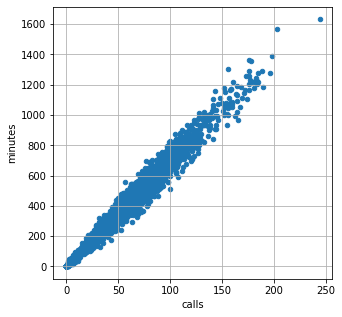

In [17]:
df.plot.scatter('calls', 'minutes', figsize=(5, 5), grid=True)

Есть очень сильная (близкая к 1) взаимосвязь между количеством звонков и количеством минут, следовательно, можно оставить только столбец с количеством минут

## Разбейте данные на выборки

Так как тестовой выборки нет, необходимо разбить данные на три части: обучающую, валидационную и тестовую.  
Размеры тестового и валидационного наборов обычно равны.  
Исходные данные разбивают в соотношении 3:1:1.  
Таким образом, обучающая выборка 60%, валидационная и тестовая - 20% каждая.

Сохраним в отдельных переменных признаки (features) и целевой признак (target)

In [41]:
features = df.drop(['is_ultra','calls'], axis=1)
target = df['is_ultra']

При помощи модуля train_test_split из библиотеки sklearn.model_selection разделим данные:  
* features_train, target_train - признаки и целевой признак обучающей выборки
* features_x, target_x - признаки и целевой признак обучающей выборки, которую разделим на тестовую и валидационную

Делим в соотношении 60% и 40%, 60% приходится на обучающую выборку

In [42]:
features_train, features_x, target_train, target_x = train_test_split(
    features, target, test_size=0.4, random_state=12345)

Теперь разделим 40% данных на тестовую и валидационную выборки (пополам):
* features_test, target_test - признаки и целевой признак тестовой выборки
* features_valid, target_valid - признаки и целевой признак валидационной выборки

In [43]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_x, target_x, test_size=0.5, random_state=12345)

In [24]:
features_train.shape[0] / df.shape[0]

0.5998755444928439

In [25]:
features_valid.shape[0] / df.shape[0]

0.2000622277535781

In [26]:
features_test.shape[0] / df.shape[0]

0.2000622277535781

## Исследуйте модели

### DecisionTreeClassifier

Исследуем модель "дерево решений", проверим глубину дерева от 1 до 10

In [27]:
best_model = None
best_result = 0

In [28]:
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучите модель с заданной глубиной дерева
    
    model.fit(features_train, target_train) # обучите модель
    
    predictions = model.predict(features_valid) # получите предсказания модели
    
    result = accuracy_score(target_valid, predictions) # посчитайте качество модели
    
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

In [29]:
print("Качество лучшей модели:", best_result, "\nГлубина дерева:", best_depth)

Качество лучшей модели: 0.7962674961119751 
Глубина дерева: 7


### RandomForestClassifier

Исследуем модель "случайный лес", проверим количество деревьев и глубину дерева от 1 до 10

In [30]:
best_model = None
best_result = 0
best_est = 0

In [31]:
for est in range(1, 11):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        
        model.fit(features_train, target_train)
        
        predictions = model.predict(features_valid) 
        
        result = accuracy_score(target_valid, predictions)
        
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

In [32]:
print("Качество лучшей модели:", best_result, "\nКоличество деревьев:", best_est, "\nГлубина дерева:", best_depth)

Качество лучшей модели: 0.8149300155520995 
Количество деревьев: 7 
Глубина дерева: 8


### LogisticRegression

Исследуем модель "логистическая регрессия"

In [44]:
model = LogisticRegression(random_state=12345, solver='liblinear')

model.fit(features_train, target_train)

predictions = model.predict(features_valid) 
        
result = accuracy_score(target_valid, predictions)

In [45]:
f1_score(target_valid, predictions_valid)

Качество модели: 0.7402799377916018


По итогам исследования моделей лучшей моделью является "случайный лес" с качеством модели 0.815 (гиперпараметры: количество деревьев - 7, глубина дерева - 8)  
На втором месте "дерево решений", качество модели 0.796, глубина дерева 7  
Хуже всех модель "логистическая регрессия", качество модели 0.698

## Проверьте модель на тестовой выборке

In [37]:
model = RandomForestClassifier(random_state=12345, n_estimators=7, max_depth=8 )

model.fit(features_train, target_train) 

predictions_test = model.predict(features_test) 

result = accuracy_score(target_test, predictions_test) 

In [38]:
print("Качество модели на тестовой выборке с наилучшими параметрами:", result)

Качество модели на тестовой выборке с наилучшими параметрами: 0.7869362363919129


## Проверьте модели на адекватность

Качество модели на тестовой выборке 0.787, что означает адекватность модели (т.е. она не предсказывает случайным образом)  
Проверим соотношение тарифов Ультра и Смарт в датасете

In [18]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Допустим, модель всегда предсказывает тариф Смарт, тогда точность модели будет 0.694, но точность модели "случайный лес" выше

In [53]:
from sklearn.dummy import DummyClassifier

strategies = ['most_frequent']

dummy_results = []

for strategy in strategies:
    dc = DummyClassifier(strategy = strategy, random_state = 0)

dc.fit(features_train, target_train)

result = dc.score(features_test, target_test)

dummy_results.append({strategy: result})

pd.DataFrame(dummy_results)

,most_frequent
0,0.706065


0.787 vs 0.706

## Выводы

Были исследованы три модели:
* дерево решений
* случайный лес
* логистическая регрессия

Наилучший результат показала модель "случайный лес", качество на валидационной выборке 0.813, на тестовой выборке - 0.785